In [13]:
#bubble sort
#counting sort
#merge sort

def bubble_sort(arr):
    L = len(arr)
    for i in range(L - 1):
        curr_max = arr[0]
        max_ind = 0
        
        for j in range(1, L - i):
            if (arr[j] > curr_max):
                curr_max = arr[j]
                max_ind = j
        
        #print(f"iter {i}, max {curr_max}, ind {max_ind}")
        
        arr[max_ind], arr[L - 1 - i] = arr[L - 1 - i], arr[max_ind]
        
        #print(arr)
    
    return arr

arr = [4, 3, 5, 4, 2, 1, 3]
#arr = [5, 3, 4]

print(arr)

srt = bubble_sort(arr)

print(srt)

[4, 3, 5, 4, 2, 1, 3]
[1, 2, 3, 3, 4, 4, 5]


In [14]:
import numpy as np

MAX_VAL = 100
LEN = 10
NUM_EXP = 10

for _ in range(NUM_EXP):
    arr_len = np.random.randint(1, LEN)
    arr = [np.random.randint(-MAX_VAL, MAX_VAL) for  _ in range(arr_len)]
    bubble_sort(arr)
    assert sorted(arr) == arr

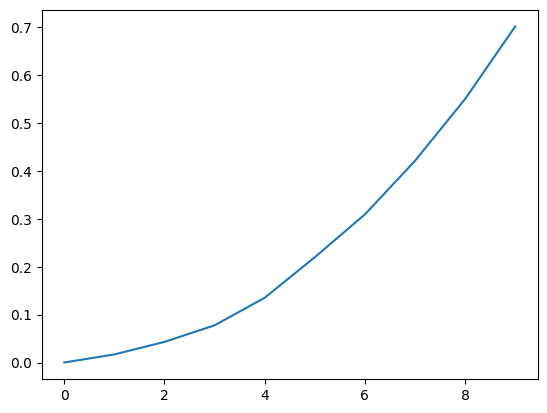

In [20]:
#sorting arrays with increasing size

import time
import matplotlib.pyplot as plt

times = []

for l in range(100, 10000, 1000):
    arr = [np.random.randint(-MAX_VAL, MAX_VAL) for  _ in range(l)]
    
    start_time = time.perf_counter()
    bubble_sort(arr)
    finish_time = time.perf_counter()
    
    time_elapsed = finish_time - start_time
    
    times.append(time_elapsed)

plt.plot(times)

In [21]:
times

[0.00020700006280094385,
 0.017016666941344738,
 0.04315479099750519,
 0.0777463330887258,
 0.13514762499835342,
 0.21971554099582136,
 0.3090684169437736,
 0.4207580420188606,
 0.5497441249899566,
 0.7010849170619622]

In [19]:
time.perf_counter()

597543.939098791

In [31]:
#counting sort
#non-negative numbers from 0 to M

def counting_sort(arr, M):
    freq = [0] * (M + 1)
    
    #calculating frequencies
    
    for el in arr:
        freq[el] += 1
    
    #filling the answer
    
    answer = []
    
    # for m in range(M + 1):
    #     for _ in range(freq[m]):
    #         answer += [m]
    
    for i, f in enumerate(freq):
        answer += [i] * f
    
    #print(freq)
    
    return answer

arr = [2, 2, 3, 3, 4, 2, 3, 4, 3, 2, 3, 0, 3, 2]
#arr = [2, 2, 3, 2]

srt = counting_sort(arr, 4)

print(srt)

[0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4]


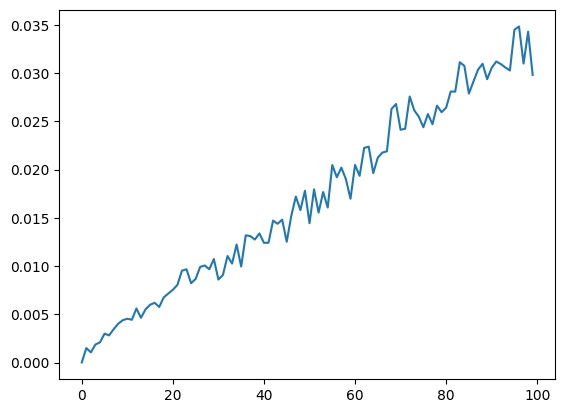

In [35]:
#sorting arrays with increasing size

import time
import matplotlib.pyplot as plt

times = []

arr = [2, 2, 3, 3, 4, 2, 3, 4, 3, 2, 3, 0, 3, 2]

for l in range(10, 100001, 1000):
    array = arr * l
    
    start_time = time.perf_counter()
    counting_sort(array, 4)
    finish_time = time.perf_counter()
    
    time_elapsed = finish_time - start_time
    
    times.append(time_elapsed)

plt.plot(times)

l = [2, 2, 4, 6, 6]
r = [2, 3, 5, 6]

1) i = 0, j = 0
l[i] = r[j]
i += 1; i = 1, j = 0 (2 to ans)

2) i = 2, j = 0 (2 to ans)

3) l[i] > r[j]
i = 2, j = 1 (2 to ans)

4) l[i] > r[j]
i = 2, j = 2 (3 to ans)

5) l[i] < r[j]
i = 3, j = 2 (4 to ans)

6) l[i] > r[j]
i = 3, j = 3 (5 to ans)

7) l[i] = r[j]
i = 4, j = 3 (6 to ans)

8) l[i] = r[j]
i = 5, j = 3 (6 to ans)

9) no comparisons
i = 5, j = 4 (6 to ans)



In [37]:
#T(n) = 2 T(n/2) + Cn

def merge(l, r):
    ans = []
    
    i, j = 0, 0
    
    while(i != len(l) or j != len(r)):
        if (i != len(l) and j != len(r)):
            if (l[i] > r[j]):
                ans.append(r[j])
                j += 1
            
            else:
                ans.append(l[i])
                i += 1
        
        elif (i != len(l)):
            ans.append(l[i])
            i += 1

        else:
            ans.append(r[j])
            j += 1
    
    return ans

def merge_alt(l, r):
    ans = []
    
    i, j = 0, 0
    
    while(i != len(l) and j != len(r)):
        if (l[i] > r[j]):
            ans.append(r[j])
            j += 1
        
        else:
            ans.append(l[i])
            i += 1
    
    ans += l[i:]
    ans += r[j:]
    
    # while (i != len(l)):
    #     ans.append(l[i])
    #     i += 1

    # while (j != len(r)):
    #     ans.append(r[j])
    #     j += 1
    
    return ans

l = [2, 2, 4, 6, 6]
r = [2, 3, 5, 6]

merged = merge_alt(l, r)

print(merged)

[2, 2, 2, 3, 4, 5, 6, 6, 6]


In [38]:
def merge_sort(arr):
    if (len(arr) < 2):
        return arr
    
    #recursive calls
    mid = len(arr) // 2
    l = merge_sort(arr[:mid])
    r = merge_sort(arr[mid:])
    
    #merge
    merged = merge(l, r)
    
    return merged

arr = [2, 2, 3, 3, 4, 2, 3, 4, 3, 2, 3, 0, 3, 2]

merged = merge_sort(arr)

print(merged)

[0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4]


In [39]:
import numpy as np

MAX_VAL = 100
LEN = 10
NUM_EXP = 10

for _ in range(NUM_EXP):
    arr_len = np.random.randint(1, LEN)
    arr = [np.random.randint(-MAX_VAL, MAX_VAL) for  _ in range(arr_len)]
    
    assert sorted(arr) == merge_sort(arr)

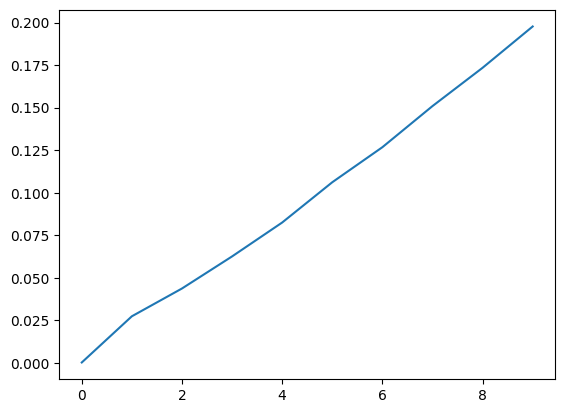

In [44]:
#sorting arrays with increasing size

import time
import matplotlib.pyplot as plt

times = []

arr = [2, 2, 3, 3, 4, 2, 3, 4, 3, 2, 3, 0, 3, 2]

for l in range(10, 10001, 1000):
    array = arr * l
    
    start_time = time.perf_counter()
    merge_sort(array)
    finish_time = time.perf_counter()
    
    time_elapsed = finish_time - start_time
    
    times.append(time_elapsed)

plt.plot(times)

In [ ]:
%pip install opencv-python

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

WINDX, WINDY = 2500, 2000

canvas = np.ones((WINDY, WINDX, 3), np.uint8) * 100

canvas[:, :, 0] = 200

# tree is described by:
# x, y
# angle between parent and child
# length of a segment
# angle of the segment
# 
# 

def draw_branch(canvas, x0, y0, angle, ang_to_child, length, depth):
    if (depth <= 0):
        return
    
    #draw segment
    x1 = int(x0 + length * np.cos(angle))
    y1 = int(y0 + length * np.sin(angle))
    
    cv2.line(canvas, (x0, y0), (x1, y1), (12, 123, 234), 2)
    
    #recursive calls
    draw_branch(canvas, x1, y1, angle + ang_to_child + np.random.randn() / 100, ang_to_child, length * 0.8, depth - 1)
    draw_branch(canvas, x1, y1, angle - ang_to_child + np.random.randn() / 100, ang_to_child, length * 0.8, depth - 1)    

s = 3 #shift

while(True):
    #canvas[:, :, 0] = 200
    #canvas[:, :, 1] = 100
    #canvas[:, :, 2] = 100
    
    canvas[:, s:, :] = canvas[:, :-s, :]
    
    canvas = cv2.addWeighted(canvas, 0.99, canvas, 0, 0)
    
    draw_branch(canvas, WINDX // 3, WINDY * 6 // 7, 3 * np.pi / 2, 0.9, 300, depth = 8)

    cv2.imshow("tree", canvas)
    key = cv2.waitKey(50) & 0xFF
    
    if (key == ord('q')):
        break

cv2.destroyAllWindows()
cv2.waitKey(100)

#plt.imshow(canvas)

-1